# Homework 
## by Tatyjana Ankudo
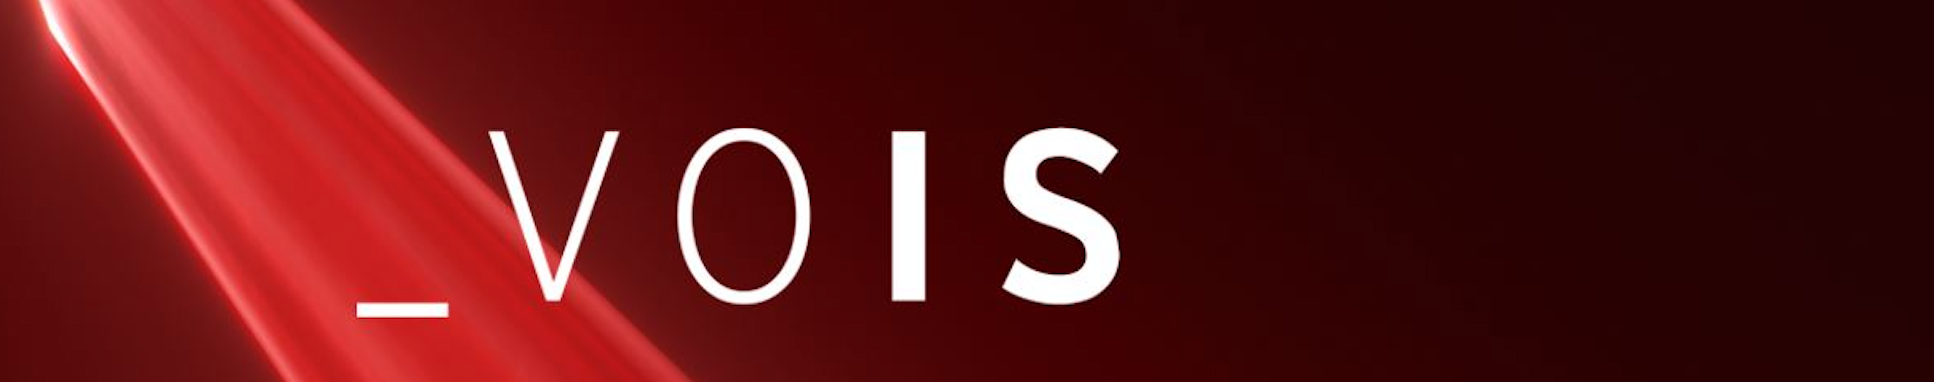

Tasks:

a) Based on the company information sheet, create clusters of the enlisted companies. 
Element of each cluster is "Company based in X country" - like "Volvo Spain".

b) Based on information found on Products and Company info sheet, recommend a product to buy for the following accounts:

- ID: 529, Country: Spain

- ID: 1240, Country: Germany

- ID: 1200, Country: Romania

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

### Open excel file

In [2]:
df_company = pd.read_excel('Data Scientist_HW.xlsx', sheet_name='Company info')

In [3]:
df_products = pd.read_excel('Data Scientist_HW.xlsx', sheet_name='Products').drop_duplicates()

In [4]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10470 entries, 0 to 10469
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         10470 non-null  object 
 1   Revenue         5996 non-null   float64
 2   Employee        9949 non-null   float64
 3   Income          10470 non-null  float64
 4   Contacts        10470 non-null  int64  
 5   Industry        10470 non-null  object 
 6   Company ID      10470 non-null  int64  
 7   Product number  10470 non-null  int64  
 8   Region          10470 non-null  object 
 9   Debt            10470 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 818.1+ KB


<div style="background-color:#fcc0c0">The dataframe contains 10470 rows and 10 colums. The columns Revenue and Employee have missing values. There are categorical and numerical variables in the dataframe.</div>

In [5]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41091 entries, 0 to 45565
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     41091 non-null  object
 1   Product     40935 non-null  object
 2   Company ID  41091 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


<div style="background-color:#fcc0c0">The dataframe with products information contains of 41091 rows and 3 columns. The column Product has missing values. There are categorical and numerical variables in the dataframe.</div>

### Joining the dataframes together

In [6]:
df = (
    pd.merge(
        df_company, df_products,  
        how='left', left_on=['Country','Company ID'], 
        right_on = ['Country','Company ID'])
)

In [7]:
df.head()

,Country,Revenue,Employee,Income,Contacts,Industry,Company ID,Product number,Region,Debt,Product
0,Czech Republic,2.061124e+10,85.0,21663.80,2,Professional Services,10052,4,Central Europe,0,Fss
1,Czech Republic,2.061124e+10,85.0,21663.80,2,Professional Services,10052,4,Central Europe,0,Mng
2,Czech Republic,2.061124e+10,85.0,21663.80,2,Professional Services,10052,4,Central Europe,0,Ant
3,Czech Republic,2.061124e+10,85.0,21663.80,2,Professional Services,10052,4,Central Europe,0,Der
4,Germany,2.143090e+09,148.0,517556.64,0,Professional Services,10052,1,Central Europe,0,Are


In [8]:
df.shape

(41091, 11)

<div style="background-color:#fcc0c0">The dimension of our dataframe is 41091 objects with 11 columns.</div>



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41091 entries, 0 to 41090
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         41091 non-null  object 
 1   Revenue         23572 non-null  float64
 2   Employee        39040 non-null  float64
 3   Income          41091 non-null  float64
 4   Contacts        41091 non-null  int64  
 5   Industry        41091 non-null  object 
 6   Company ID      41091 non-null  int64  
 7   Product number  41091 non-null  int64  
 8   Region          41091 non-null  object 
 9   Debt            41091 non-null  int64  
 10  Product         40935 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 3.8+ MB


<div style="background-color:#fcc0c0">Company ID is categorical feature. Must be converted from integer</div>

In [10]:
df['Company ID'] = df['Company ID'].astype(str)

### Creating new feature `company_based` because of the requirement of the task

In [11]:
df['company_based'] = df['Country'] + "_" + df['Company ID']

<div style="background-color:#fcc0c0">For this home work is enough to use company_based and product features but let's make EDA anyway</div>

In [12]:
# keeping unmodified vertion of the dataframe
df_ori = df.copy()

## EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41091 entries, 0 to 41090
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         41091 non-null  object 
 1   Revenue         23572 non-null  float64
 2   Employee        39040 non-null  float64
 3   Income          41091 non-null  float64
 4   Contacts        41091 non-null  int64  
 5   Industry        41091 non-null  object 
 6   Company ID      41091 non-null  object 
 7   Product number  41091 non-null  int64  
 8   Region          41091 non-null  object 
 9   Debt            41091 non-null  int64  
 10  Product         40935 non-null  object 
 11  company_based   41091 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 4.1+ MB


In [14]:
df.isnull().sum()

Country               0
Revenue           17519
Employee           2051
Income                0
Contacts              0
Industry              0
Company ID            0
Product number        0
Region                0
Debt                  0
Product             156
company_based         0
dtype: int64

<AxesSubplot:>

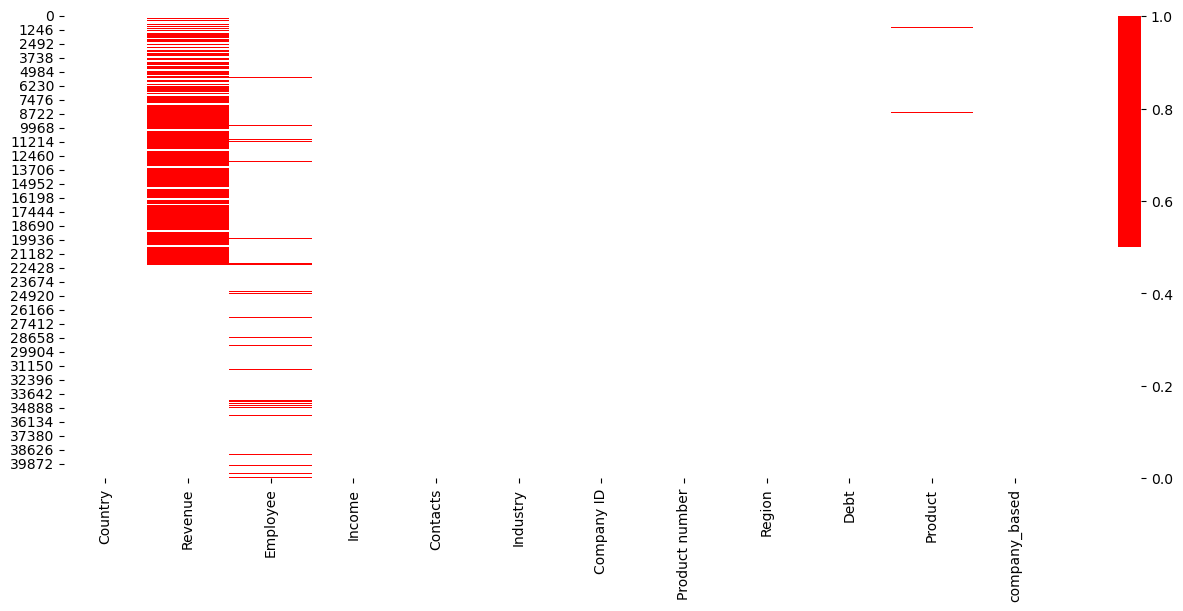

In [15]:
colors = ['white', 'red']
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors))

<div style="background-color:#fcc0c0">The column Revenue has more then 30% of missing values. We have some missing values in Employee and very few in Product columns. Let's try if it possible to fill it by logical approach</div>

In [16]:
df[(df.Country == 'Switzerland') & (df.Industry == 'Automotive') & (df.Revenue>0)]

,Country,Revenue,Employee,Income,Contacts,Industry,Company ID,Product number,Region,Debt,Product,company_based


<div style="background-color:#fcc0c0">Revenue can be deleted because data are missing for whole set of country, and usage of logical approach is not applicable also it's not good idea to fill the missing values with the avreage here</div>

In [17]:
columns_to_drop=['Revenue']

In [18]:
df[(df.Income == 0)]

,Country,Revenue,Employee,Income,Contacts,Industry,Company ID,Product number,Region,Debt,Product,company_based
26,Italy,7.733481e+07,251.0,0.0,1,Professional Services,10052,1,Southern Europe,0,Sty,Italy_10052
29,Mozambique,1.546115e+09,94.0,0.0,2,Technology,10052,4,Middle East & Africa,1000,NaN,Mozambique_10052
30,Mozambique,1.546115e+09,94.0,0.0,2,Technology,10052,4,Middle East & Africa,1000,Vce,Mozambique_10052
31,Mozambique,1.546115e+09,94.0,0.0,2,Technology,10052,4,Middle East & Africa,1000,Vty,Mozambique_10052
32,Mozambique,1.546115e+09,94.0,0.0,2,Technology,10052,4,Middle East & Africa,1000,Ant,Mozambique_10052
...,...,...,...,...,...,...,...,...,...,...,...,...
41079,Spain,0.000000e+00,406.0,0.0,0,Professional Services,149,5,Southern Europe,0,Ims,Spain_149
41080,Spain,0.000000e+00,406.0,0.0,0,Professional Services,149,5,Southern Europe,0,Ave,Spain_149
41081,Spain,0.000000e+00,406.0,0.0,0,Professional Services,149,5,Southern Europe,0,Cer,Spain_149
41082,Spain,0.000000e+00,406.0,0.0,0,Professional Services,149,5,Southern Europe,0,Ply,Spain_149


<div style="background-color:#fcc0c0">Income can be deleted because more then a hal have 0 value</div>

In [19]:
columns_to_drop.append('Income')

In [20]:
df.nunique()

Country             123
Revenue            2627
Employee           3865
Income             4627
Contacts             30
Industry             15
Company ID         1258
Product number       60
Region                8
Debt                  6
Product              53
company_based     10470
dtype: int64

<div style="background-color:#fcc0c0">Our dataframe consists of 123 countries, 15 inductries, 8 regions and 53 products </div>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41091 entries, 0 to 41090
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         41091 non-null  object 
 1   Revenue         23572 non-null  float64
 2   Employee        39040 non-null  float64
 3   Income          41091 non-null  float64
 4   Contacts        41091 non-null  int64  
 5   Industry        41091 non-null  object 
 6   Company ID      41091 non-null  object 
 7   Product number  41091 non-null  int64  
 8   Region          41091 non-null  object 
 9   Debt            41091 non-null  int64  
 10  Product         40935 non-null  object 
 11  company_based   41091 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 4.1+ MB


#### Top 10 Countries represented in the dataframe

<AxesSubplot:>

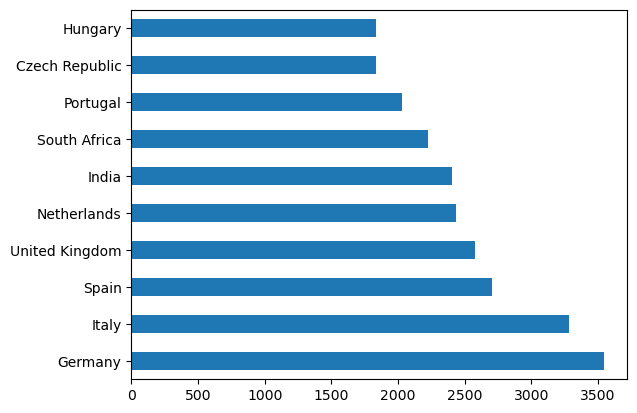

In [22]:
df.Country.value_counts()[:10].plot(kind='barh')

#### Top 10 companiies represented in the dataframe

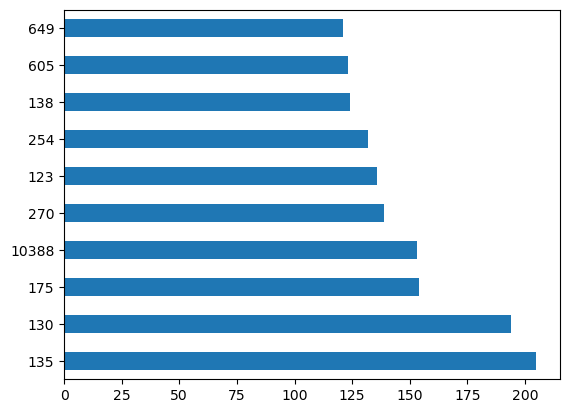

In [23]:
df['Company ID'].value_counts()[:10].plot(kind='barh');

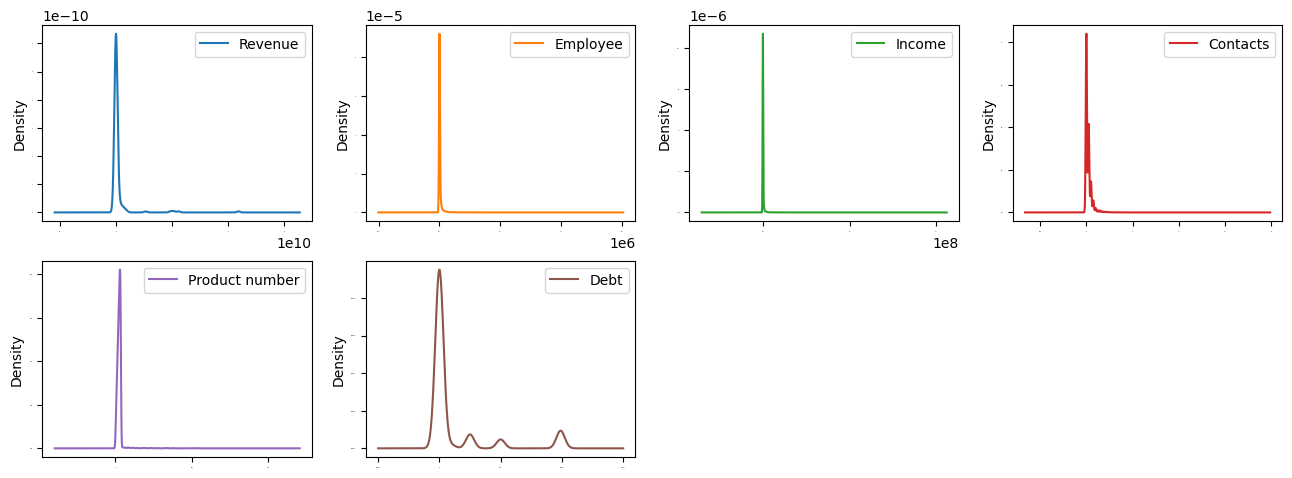

In [24]:
df.plot(
    kind='kde', 
    subplots=True, 
    layout=(8,4), 
    sharex=False, 
    legend=True,
    fontsize=1, 
    figsize=(16,24)
);

<div style="background-color:#fcc0c0">Most of the features have normal distribution but `dept` has strange pattern. Let's look at it closer. </div>

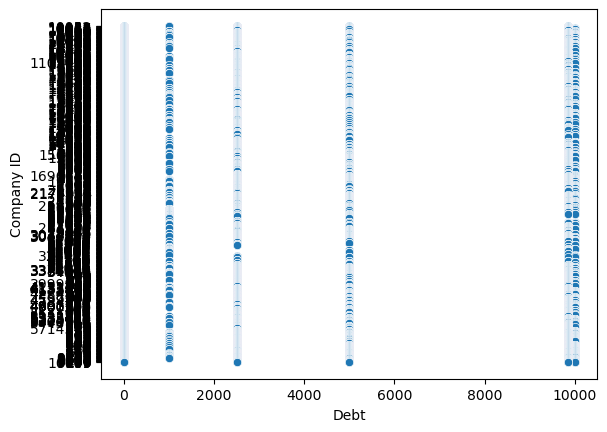

In [25]:
sns.scatterplot(data=df, x='Debt', y='Company ID');

<div style="background-color:#fcc0c0">The are only 6 values in Dept column, so this column has no sence, can be deleted</div>

In [26]:
columns_to_drop.append('Debt')

In [27]:
regions = df.Region.value_counts().to_dict()

In [28]:
for region in regions:
    print(region)
    print(df[df.Region == region].Country.value_counts())

Southern Europe
Italy         3282
Spain         2704
Portugal      2028
Turkey        1645
Greece        1183
Albania        249
MNS_Turkey       4
Cyprus           3
MNS_Greece       2
Name: Country, dtype: int64
Central Europe
Germany                        3542
Czech Republic                 1834
Hungary                        1833
Romania                        1587
Switzerland                     380
Austria                         179
Bulgaria                        152
Russian Federation              118
Croatia                          77
Poland                           70
Serbia                           66
Ukraine                          54
Slovenia                         26
Slovakia                         21
Estonia                          15
Republic of North Macedonia      11
Lithuania                        11
Latvia                            5
Liechtenstein                     4
Bosnia and Herzegovina            2
Name: Country, dtype: int64
Northern Europe
United

<div style="background-color:#fcc0c0">It's visible that country are distributed well between regions. Also we could find two fake countries Vodafone Automotive and VGEL. The column Region has no meaning </div>

In [29]:
columns_to_drop.append('Region')

In [30]:
df[df.Employee == 0]

,Country,Revenue,Employee,Income,Contacts,Industry,Company ID,Product number,Region,Debt,Product,company_based
601,Egypt,NaN,0.0,626972.06,2,Professional Services,150,2,Middle East & Africa,10000,Oet,Egypt_150
602,Egypt,NaN,0.0,626972.06,2,Professional Services,150,2,Middle East & Africa,10000,Ces,Egypt_150


In [31]:
df[df['Company ID'] == '116'].Employee.value_counts()

3965.0     7
12923.0    5
10668.0    4
787.0      4
12608.0    3
896.0      1
Name: Employee, dtype: int64

<div style="background-color:#fcc0c0">Employee has no meaning, and can be deleted</div>

In [32]:
columns_to_drop.append('Employee')
columns_to_drop.append('Country')
columns_to_drop.append('Company ID')

In [33]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41091 entries, 0 to 41090
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Contacts        41091 non-null  int64 
 1   Industry        41091 non-null  object
 2   Product number  41091 non-null  int64 
 3   Product         40935 non-null  object
 4   company_based   41091 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [35]:
rows_to_drop = list(df[df.isnull().any(axis=1)].index)

In [36]:
df.drop(labels=rows_to_drop, axis=0, inplace=True)

<AxesSubplot:>

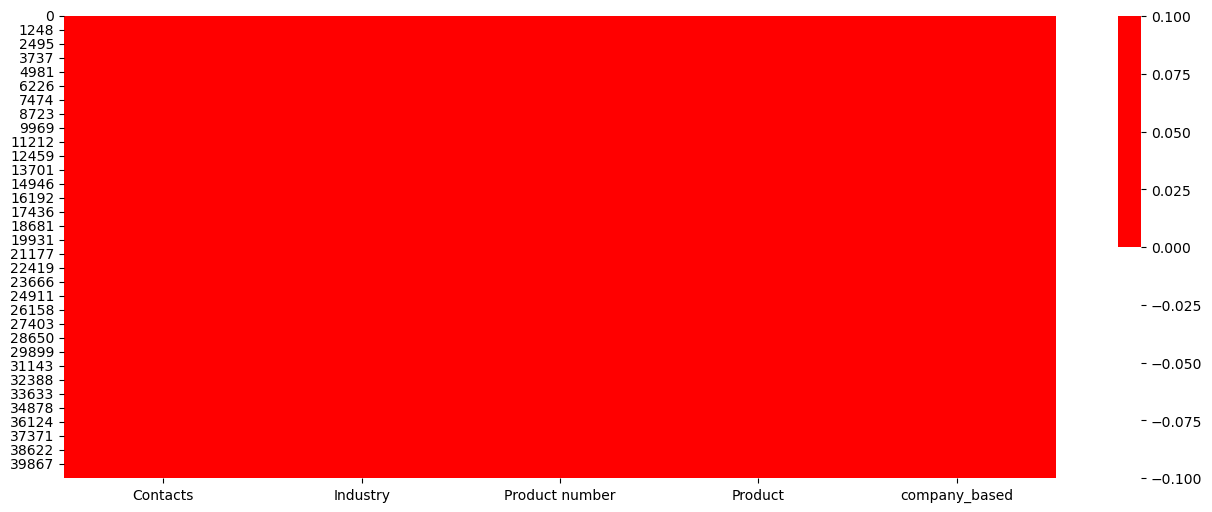

In [37]:
colors = ['white', 'red']
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40935 entries, 0 to 41090
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Contacts        40935 non-null  int64 
 1   Industry        40935 non-null  object
 2   Product number  40935 non-null  int64 
 3   Product         40935 non-null  object
 4   company_based   40935 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


## Building a Product Recommendation System with Collaborative Filtering

In [39]:
customer_item_matrix = df.pivot_table(
    index='company_based', 
    columns='Product', 
    values='Product number',
    aggfunc='sum'
)

In [40]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [41]:
customer_item_matrix

Product,Ant,Are,Ase,Ave,CIT,Cct,Cer,Ces,Cng,Con,...,Sty,Sup,Tnt,Uct,Ues,Vce,Vns,Vny,Vty,WN)
company_based,,,,,,,,,,,,,,,,,,,,,
Albania_10378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania_10388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Albania_1082,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
Albania_1103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania_117,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe_135,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
Zimbabwe_270,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zimbabwe_32656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)

In [43]:
user_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,10440,10441,10442,10443,10444,10445,10446,10447,10448,10449
0,1.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.408248,0.218218,...,0.258199,0.000000,0.0,0.000000,0.218218,0.0,0.000000,0.0,0.00,0.000000
1,0.0,1.000000,0.258199,0.000000,0.235702,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.218218,0.0,0.000000,0.0,0.00,0.000000
2,0.0,0.258199,1.000000,0.000000,0.182574,0.000000,0.000000,0.000000,0.000000,0.169031,...,0.200000,0.258199,0.0,0.000000,0.169031,0.0,0.200000,0.0,0.00,0.000000
3,0.0,0.000000,0.000000,1.000000,0.408248,0.000000,0.000000,0.577350,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000
4,0.0,0.235702,0.182574,0.408248,1.000000,0.000000,0.408248,0.235702,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.182574,0.0,0.00,0.204124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10445,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.00,0.000000
10446,0.0,0.000000,0.200000,0.000000,0.182574,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.258199,0.0,0.365148,0.169031,0.0,1.000000,0.2,0.00,0.000000
10447,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.182574,0.169031,0.0,0.200000,1.0,0.00,0.000000
10448,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.188982,...,0.447214,0.000000,0.0,0.204124,0.000000,0.0,0.000000,0.0,1.00,0.250000


In [44]:
user_user_sim_matrix.columns = customer_item_matrix.index

In [45]:
user_user_sim_matrix

company_based,Albania_10378,Albania_10388,Albania_1082,Albania_1103,Albania_117,Albania_13035,Albania_1309,Albania_1317,Albania_13226,Albania_1343,...,Zambia_158,Zambia_175,Zambia_270,Zambia_27557,Zambia_382,Zimbabwe_135,Zimbabwe_270,Zimbabwe_32656,Zimbabwe_583,Zimbabwe_684
0,1.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.408248,0.218218,...,0.258199,0.000000,0.0,0.000000,0.218218,0.0,0.000000,0.0,0.00,0.000000
1,0.0,1.000000,0.258199,0.000000,0.235702,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.218218,0.0,0.000000,0.0,0.00,0.000000
2,0.0,0.258199,1.000000,0.000000,0.182574,0.000000,0.000000,0.000000,0.000000,0.169031,...,0.200000,0.258199,0.0,0.000000,0.169031,0.0,0.200000,0.0,0.00,0.000000
3,0.0,0.000000,0.000000,1.000000,0.408248,0.000000,0.000000,0.577350,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000
4,0.0,0.235702,0.182574,0.408248,1.000000,0.000000,0.408248,0.235702,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.182574,0.0,0.00,0.204124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10445,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.00,0.000000
10446,0.0,0.000000,0.200000,0.000000,0.182574,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.258199,0.0,0.365148,0.169031,0.0,1.000000,0.2,0.00,0.000000
10447,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.182574,0.169031,0.0,0.200000,1.0,0.00,0.000000
10448,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.188982,...,0.447214,0.000000,0.0,0.204124,0.000000,0.0,0.000000,0.0,1.00,0.250000


In [46]:
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')

In [47]:
items_bought_by_A = set(customer_item_matrix.loc['Zimbabwe_583'].iloc[
    customer_item_matrix.loc['Zimbabwe_583'].to_numpy().nonzero()
].index)

In [48]:
items_bought_by_A

{'CIT', 'Des', 'Ies', 'Vny'}

In [49]:
item_item_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix.T)
)

In [50]:
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')

In [51]:
item_item_sim_matrix

Product,Ant,Are,Ase,Ave,CIT,Cct,Cer,Ces,Cng,Con,...,Sty,Sup,Tnt,Uct,Ues,Vce,Vns,Vny,Vty,WN)
StockCode,,,,,,,,,,,,,,,,,,,,,
Ant,1.000000,0.078265,0.083656,0.081350,0.061340,0.087043,0.064166,0.058481,0.088741,0.056277,...,0.075717,0.066713,0.073220,0.067027,0.068930,0.073927,0.077658,0.078552,0.094151,0.073856
Are,0.078265,1.000000,0.084570,0.065599,0.078432,0.078864,0.068256,0.074267,0.086993,0.082111,...,0.081904,0.074742,0.081258,0.082790,0.079047,0.059050,0.073457,0.080730,0.073837,0.072401
Ase,0.083656,0.084570,1.000000,0.092523,0.072133,0.068793,0.083083,0.080884,0.083083,0.063211,...,0.061791,0.068388,0.072062,0.089349,0.074122,0.070088,0.081595,0.056297,0.088348,0.077600
Ave,0.081350,0.065599,0.092523,1.000000,0.076287,0.079285,0.087370,0.076037,0.075456,0.081219,...,0.050634,0.075249,0.066979,0.066292,0.093320,0.066373,0.089833,0.083538,0.089989,0.079152
CIT,0.061340,0.078432,0.072133,0.076287,1.000000,0.079277,0.068613,0.075966,0.068613,0.070934,...,0.073328,0.083184,0.070793,0.073977,0.075616,0.084992,0.063102,0.086148,0.060970,0.071504
Cct,0.087043,0.078864,0.068793,0.079285,0.079277,1.000000,0.077174,0.068655,0.081166,0.073982,...,0.078884,0.075635,0.075401,0.077084,0.067180,0.081390,0.091621,0.087671,0.083896,0.065667
Cer,0.064166,0.068256,0.083083,0.087370,0.068613,0.077174,1.000000,0.080458,0.077135,0.050177,...,0.068490,0.071429,0.073873,0.070330,0.083978,0.081492,0.078351,0.058800,0.080063,0.061442
Ces,0.058481,0.074267,0.080884,0.076037,0.075966,0.068655,0.080458,1.000000,0.076435,0.062989,...,0.089758,0.072213,0.085488,0.073735,0.081756,0.083370,0.073601,0.083377,0.076624,0.073815
Cng,0.088741,0.086993,0.083083,0.075456,0.068613,0.081166,0.077135,0.076435,1.000000,0.083188,...,0.067173,0.064561,0.075267,0.068977,0.072169,0.071823,0.079725,0.088200,0.074635,0.090201


In [52]:
def recommendation(Country_id):
    recomend = []
    top_10_similar_items = list(
       user_user_sim_matrix\
            .loc[Country_id]\
            .sort_values(ascending=False)\
            .iloc[1:6]\
        .index
    )
    items_bought_by_A = set(customer_item_matrix.loc[Country_id].iloc[
        customer_item_matrix.loc[Country_id].to_numpy().nonzero()
    ].index)
    for top in top_10_similar_items:

        items_bought_by_A = set(customer_item_matrix.loc[top].iloc[
        customer_item_matrix.loc[top].to_numpy().nonzero()
        ].index)
#         print('Similar companies:')
#         print(top, items_bought_by_A)

        top_10_similar_items_des = list(
       item_item_sim_matrix\
            .loc[next(iter(items_bought_by_A))]\
            .sort_values(ascending=False)\
            .iloc[1:2]\
        .index
    )
        recomend.append(top_10_similar_items_des)
    my_set = {i for lst in recomend for i in lst}
#     print(f'Products bought by {Country_id}: ', items_bought_by_A)
#     print(f'Recomendations for {Country_id}: ', my_set)
    return next(iter(my_set))

In [53]:
recommendation('Spain_529')

'Mks'

In [54]:
df_ori.head()

,Country,Revenue,Employee,Income,Contacts,Industry,Company ID,Product number,Region,Debt,Product,company_based
0,Czech Republic,2.061124e+10,85.0,21663.80,2,Professional Services,10052,4,Central Europe,0,Fss,Czech Republic_10052
1,Czech Republic,2.061124e+10,85.0,21663.80,2,Professional Services,10052,4,Central Europe,0,Mng,Czech Republic_10052
2,Czech Republic,2.061124e+10,85.0,21663.80,2,Professional Services,10052,4,Central Europe,0,Ant,Czech Republic_10052
3,Czech Republic,2.061124e+10,85.0,21663.80,2,Professional Services,10052,4,Central Europe,0,Der,Czech Republic_10052
4,Germany,2.143090e+09,148.0,517556.64,0,Professional Services,10052,1,Central Europe,0,Are,Germany_10052


In [55]:
my_input = {'Spain':529, 'Germany':1240, 'Romania':1200}
selection_list = []
for key, value in my_input.items():
    selection = key+ '_' + str(value)
    selection_list.append(selection)
    

df_sel = df_ori[(df_ori['company_based'].isin(selection_list))]
recomm = {}

for i in selection_list:
    recomm[i] = recommendation(i)

recomm

{'Spain_529': 'Mks', 'Germany_1240': 'Mta', 'Romania_1200': 'Hud'}

In [59]:
conditions = []
values = []
for k, v in recomm.items():
    conditions.append(df_sel['company_based'] == k)
#     print(conditions)
    values.append(v)

# create a new column and use np.select to assign values to it using our lists as arguments
df_sel['Recommended product'] = np.select(conditions, values)

# display updated DataFrame
df_sel.drop('Product', axis=1, inplace=True)

/var/folders/mp/981dprsj49dbyd4clvj123sm0000gn/T/ipykernel_31471/657246035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['Recommended product'] = np.select(conditions, values);


## The result

In [57]:
df_sel.drop_duplicates()

,Country,Revenue,Employee,Income,Contacts,Industry,Company ID,Product number,Region,Debt,company_based,Recommended product
5600,Romania,1.063283e+08,5285.0,245727.6,2,Professional Services,1200,5,Central Europe,0,Romania_1200,Hud
6729,Germany,2.757110e+09,1394.0,1392.0,2,Professional Services,1240,11,Central Europe,0,Germany_1240,Mta
31612,Spain,3.313094e+05,239.0,0.0,1,Travel & Tourism,529,36,Southern Europe,0,Spain_529,Mks
